<a href="https://colab.research.google.com/github/AnshumanMohapatra11121999/DataScienceAndAI-/blob/main/DataVisualization_case_study_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We will be learning this lesson through a case study. This will help you see how data visualisation can help you solve business problems

In [607]:
import numpy as np

In [608]:
import pandas as pd

In [609]:
#Problem Statement:Build a feature ti boost visibility of promising apps in the google playstore
#proising apps are promoted in the recommendation sections

In [610]:
'''
The Google Play Store team is working on a feature that will allow them to highlight the most promising apps. This analysis would now necessitate a basic understanding of the characteristics that make a high-performing app. You might pose questions like the following:

Does an app being larger or more expensive inevitably indicate that it will perform better than the others?
Is it true that a bigger number of instals indicates which app will get a higher rating than others?
'''
#we will learn to use data visualisation to answer these questions and derive corresponding insights.

'\nThe Google Play Store team is working on a feature that will allow them to highlight the most promising apps. This analysis would now necessitate a basic understanding of the characteristics that make a high-performing app. You might pose questions like the following:\n\nDoes an app being larger or more expensive inevitably indicate that it will perform better than the others?\nIs it true that a bigger number of instals indicates which app will get a higher rating than others?\n'

In [611]:
pldf=pd.read_csv("/content/googleplaystore_v2.csv")

In [612]:
pldf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [613]:
#Create a backup for the dataset
pldfbackup=pldf

In [614]:
#Question to be answered
"""Target Variable
In the world of machine learning, the target variable is defined as the variable or column in a data set whose value is to be predicted or analysed by using the other variables in the same data set.
For our case study, which of the following is the target variable?"""

#The answer:
'''
Ans-Rating
You want to look at the data to see what factors determine whether an app performs well or poorly in ratings.
As a result, the Rating column is the variable we want to focus on. To find the most essential indicators for high-performing apps, you will look at how the rating differs across different categories of other variables.
'''

'\nAns-Rating\nYou want to look at the data to see what factors determine whether an app performs well or poorly in ratings. \nAs a result, the Rating column is the variable we want to focus on. To find the most essential indicators for high-performing apps, you will look at how the rating differs across different categories of other variables.\n'

In [615]:
pldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [616]:
pldf.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [617]:
pldf.value_counts()

,,,,,,,,,,,,,count
App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,
WatchESPN,SPORTS,4.1,288809,6600.000000,"10,000,000+",Free,0,Everyone,Sports,"September 27, 2017",2.5.1,4.4 and up,4
eBay: Buy & Sell this Summer - Discover Deals Now!,SHOPPING,4.4,2788923,21516.529524,"100,000,000+",Free,0,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device,4
"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,4.3,91031,21516.529524,"5,000,000+",Free,0,Everyone,Sports,"August 4, 2018",Varies with device,5.0 and up,4
Google Keep,PRODUCTIVITY,4.4,691474,21516.529524,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,4
Nick,ENTERTAINMENT,4.2,123279,25000.000000,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Driving Suv Toyota Car Simulator,FAMILY,3.7,187,54000.000000,"10,000+",Free,0,Everyone,Simulation,"November 12, 2017",1,4.0 and up,1
Driving Zone,GAME,4.2,51791,57000.000000,"1,000,000+",Free,0,Everyone,Racing,"June 6, 2018",1.53,4.1 and up,1
Driving n Parking School 2017,FAMILY,4.5,15,46000.000000,"1,000+",Free,0,Everyone,Simulation,"May 31, 2017",1.0,2.3 and up,1


In [618]:
pldf.shape

(10841, 13)

# Data Handling and Cleaning – I

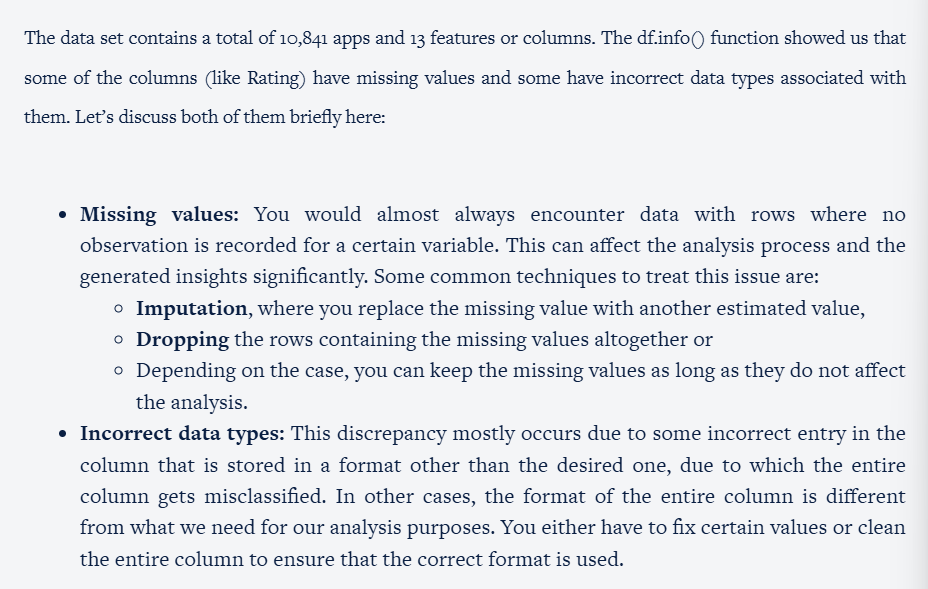

In [619]:
#Count null values for each column
pldf.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [620]:
#Handle missing value in the rating column
#rating is the target variable
#We cant do guess works because its important so we should drop the records
pldf=pldf[pldf.Rating.isnull()==False]

In [621]:
pldf.shape

(9367, 13)

In [622]:
pldf.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,1
Genres,0


In [623]:
#Total 8 null values left

In [624]:
#Lets check the null value in the android version column
pldf[pldf["Android Ver"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [625]:
pldf.loc[10472,:]

,10472
App,Life Made WI-Fi Touchscreen Photo Frame
Category,1.9
Rating,19.0
Reviews,3.0M
Size,21516.529524
Installs,Free
Type,0
Price,Everyone
Content Rating,NaN
Genres,"February 11, 2018"


In [626]:
#Drop the last record because the column values are swapped it would be easier to delete the row

pldf = pldf.drop(10472)


In [627]:
#lets check its get deleted or not
pldf.shape
#its deleted because the no of rows earlier where 9367


(9366, 13)

In [628]:
#For the other two rows where the android version is null we can impute mostly occuring values or mode to solve this problem as its also a categorical value.
#First lets find the most occuring value
pldf["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2059
Varies with device,1319
4.0.3 and up,1240
4.0 and up,1131
4.4 and up,875
2.3 and up,582
5.0 and up,535
4.2 and up,338
2.3.3 and up,240


In [629]:
 #find the null value in the "Android ver" column fill it with this value
pldf["Android Ver"]=pldf["Android Ver"].fillna("4.1 and up")

In [630]:
pldf.isnull().sum()#lets check

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [631]:
pldf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [632]:
#lets do same with current version column there are 4 missing value left inside it
pldf[pldf["Current Ver"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [633]:
#lets find out the mostly occuring value i.e mode as it is a categorical datatype
pldf["Current Ver"].mode()

,Current Ver
0,Varies with device


In [634]:
#impute it inplace of the missing values in the same column
pldf["Current Ver"]=pldf["Current Ver"].fillna(pldf["Current Ver"].mode()[0])

In [635]:
pldf.loc[15,:]#its got imputed successfully

,15
App,Learn To Draw Kawaii Characters
Category,ART_AND_DESIGN
Rating,3.2
Reviews,55
Size,2700.0
Installs,"5,000+"
Type,Free
Price,0
Content Rating,Everyone
Genres,Art & Design


In [636]:
#Now our data frame is free of missing values/NaN

In [637]:
#Question
#What is the average price for all the apps that have the Android version as ‘4.1 and up’?
#Answer later

In [638]:
#Now we need to check the column wise where the dataset is numeric then make it either integer or float datatype

In [639]:
pldf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [640]:
pldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


In [641]:
#price column has strings values in it where as we need int or float type column
#lets check what kind of values there in the column and their counts
pldf["Price"].value_counts()

,count
Price,
0,8719
$2.99,114
$0.99,107
$4.99,70
$1.99,59
...,...
$2.95,1
$2.90,1
$1.97,1


In [642]:
#As majority have 0 dollar price and the string itself has a special character "$" used in the starting of price we need to remove it"
print(type(pldf.loc[2,"Price"]))#lets check the type of the data inside the column
#As we know its string lets start removing the "$" value
pldf["Price"]=pldf["Price"].apply(lambda x:float(x[1:]) if x!="0" else x)
#lets check the changes
pldf["Price"].value_counts()
pldf["Price"]=pldf["Price"].astype(int)
print(type(pldf.loc[2,"Price"]))

<class 'str'>
<class 'numpy.int64'>


In [643]:
#let’s inspect the Reviews column and make the necessary changes to it.

In [644]:
pldf["Reviews"].value_counts()

,count
Reviews,
2,83
3,78
5,74
4,74
1,67
...,...
9894,1
316378,1
8484,1


In [645]:
#lets check the datatype of the value present in the column
print(type(pldf.loc[3,"Reviews"]))#as the type is str we need to convert it to integer type
pldf["Reviews"]=pldf["Reviews"].astype("int")
print(type(pldf.loc[3,"Reviews"]))#its changes now

<class 'str'>
<class 'numpy.int64'>


In [646]:
pldf["Reviews"].describe()

,Reviews
count,9.366000e+03
mean,5.140498e+05
std,3.144042e+06
min,1.000000e+00
25%,1.862500e+02
50%,5.930500e+03
75%,8.153275e+04
max,7.815831e+07


In [647]:
#lets solve the installs column now
pldf["Installs"].value_counts()

,count
Installs,
"1,000,000+",1577
"10,000,000+",1252
"100,000+",1150
"10,000+",1010
"5,000,000+",752
"1,000+",713
"500,000+",538
"50,000+",467
"5,000+",432


In [648]:
#lets chek the datatype of the values
print(type(pldf.loc[3,"Installs"]))#its str
#issue here is this figures include commas and "+" symbol in the string which you wanna convert to int type
pldf["Installs"]=pldf["Installs"].apply(lambda x:int(x.replace(",","").replace("+","")))
#now lets check if the plus and commas in the value are gone or not
#lets check the datatype is converted to int or not
print(pldf[["Installs"]].value_counts())
print(type(pldf.loc[3,"Installs"]))#type is int

<class 'str'>
Installs  
1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: count, dtype: int64
<class 'numpy.int64'>


In [649]:
#Question:After removing the additional symbols in the Installs column, calculate the approximate number of installs at the 50th percentile.
print(np.percentile(pldf["Installs"],50))#Ans:500000.0

500000.0


# Sanity Checks


Once you have completed the basic data cleansing and data handling tasks, the next step is to ensure that the data available to us ‘makes sense’. What this means is that the data needs to be factually correct apart from being of the correct data type.

For example, on a test where you can score between 0 and 100, a student cannot score 110 marks. If such discrepancies occur in a data set, you need to take care of them accordingly. So, in order to quickly check whether the data in the columns is rational and makes sense, you need to perform the so-called sanity checks

In [650]:
#avg rating can be 1 to 5 lets check
pldf["Rating"].describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [651]:
pldf[pldf["Reviews"]>pldf["Installs"]].shape#There are 7 rows which have these kind of value

(7, 13)

In [652]:
#another condition which we can check rreviews>Installs
#lets check if there are these type of rows
pldf[pldf["Reviews"]>pldf["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [653]:
#Drop these records becuse its not factually right
pldf=pldf[pldf["Reviews"]<pldf["Installs"]]

In [654]:
#now lets check if same cases exist
pldf[pldf["Reviews"]>pldf["Installs"]].shape#O ROWLS LIKE THAT LEFT IT WORKED

(0, 13)

In [655]:
#Another condition is free apps cannot have price other than 0
pldf[(pldf["Type"]=="Free")&(pldf["Price"]>0)].shape

#No such records here

(0, 13)

In [656]:
'''
three essential sanity checks were performed on the data:

Rating is between 1 and 5 for all the apps.
Number of reviews is less than or equal to the number of installs.
Free apps should not have a price greater than 0.

'''

'\nthree essential sanity checks were performed on the data:\n\nRating is between 1 and 5 for all the apps.\nNumber of reviews is less than or equal to the number of installs.\nFree apps should not have a price greater than 0.\n\n'

## Outliers Analysis With Box Plots


It is time to finally turn our attention to identifying and removing extreme values or outliers from the data set. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you will start using visualisation to achieve your tasks, and the visualisation best suited for this is the box plot.

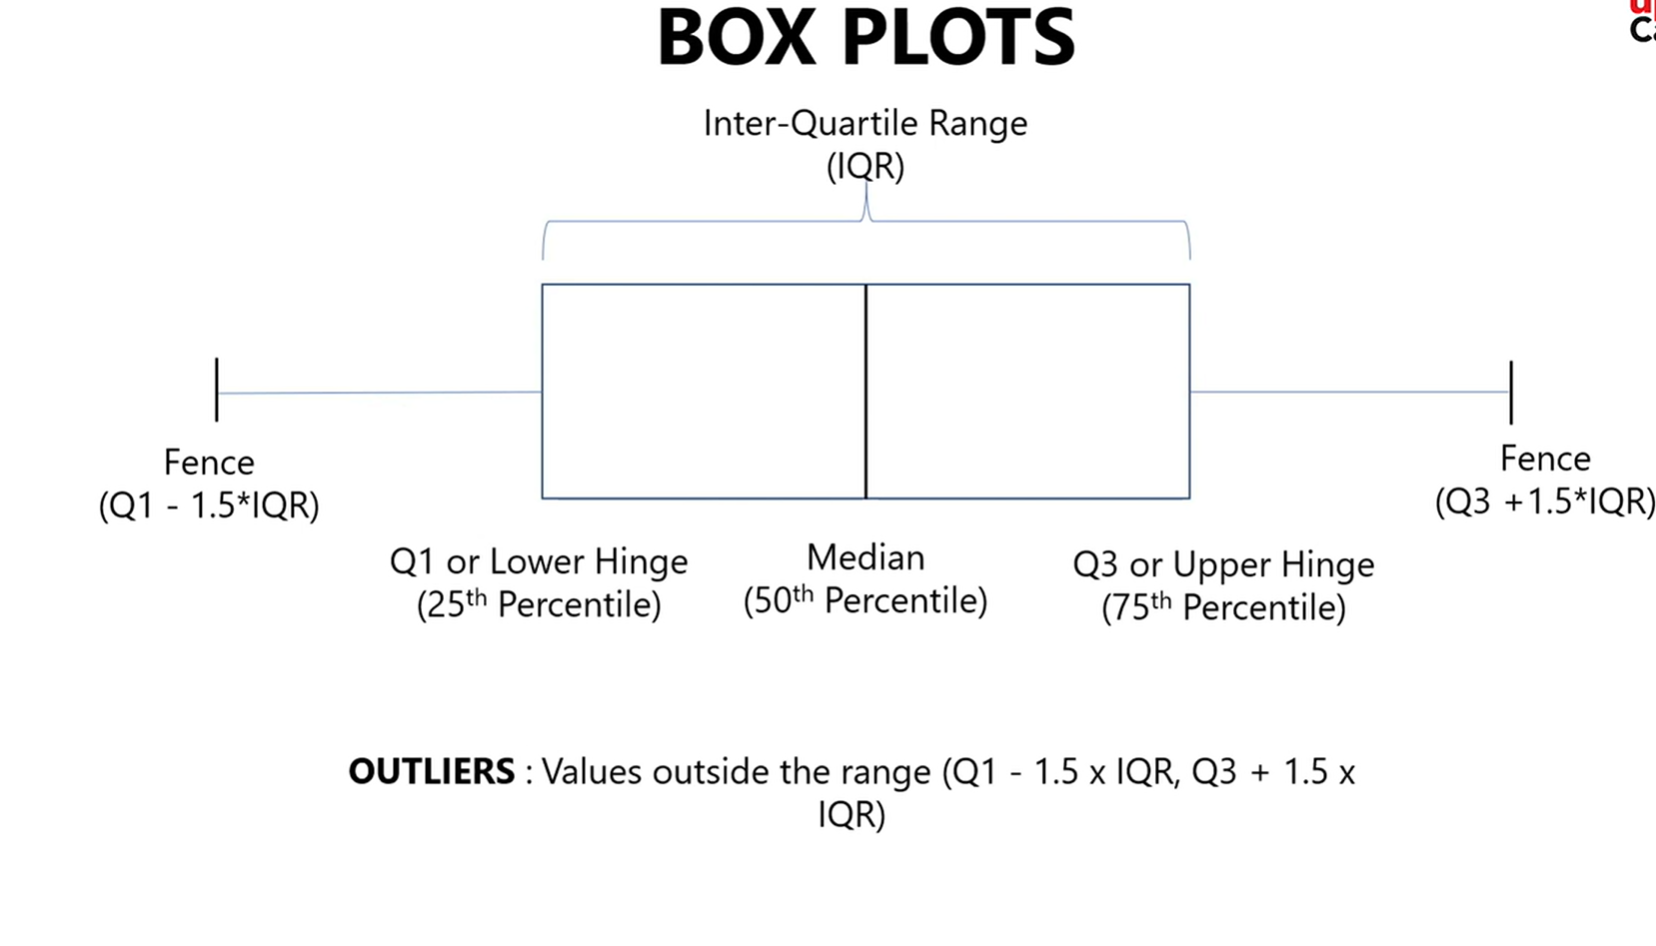

In [657]:
import matplotlib.pyplot as plt

In [658]:
# %matplotlib inline tells Jupyter to display plots directly
# inside the notebook, rather than in a separate window
%matplotlib inline

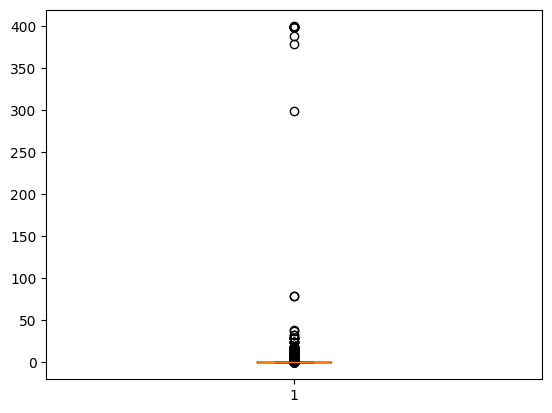

In [659]:
plt.boxplot(pldf["Price"])
plt.show()

In [660]:
#Lets check out the highr extreme values prices above 300 dollars
pldf[pldf["Price"]>300]#This looks suspicious not worthy of the records we should have in the data set

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700.0,5000,Paid,399,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


In [661]:
# Note on the difference between these two statements:

# 1. This line overwrites the 'Price' column with boolean values:
#    It replaces numeric prices with True/False depending on the condition.
#    This means the original price data is lost!
#pldf["Price"] = pldf["Price"] < 200

#I did a mistake here in the above line code so avoid it

# 2. This line filters the DataFrame rows to keep only those where Price < 200:
#    The original 'Price' column remains unchanged and numeric.
pldf = pldf[pldf["Price"] < 200]

# Summary:
# - Use statement 1 only if you want to convert 'Price' column to booleans.
# - Use statement 2 if you want to keep numeric prices but filter rows.
# - To keep both numeric prices and a boolean flag, create a new column:
#   pldf["Price_under_200"] = pldf["Price"] < 200


In [662]:
pldf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [663]:
pldf["Price"].describe()

,Price
count,9342.000000
mean,0.274031
std,2.046470
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,79.000000


<Axes: >

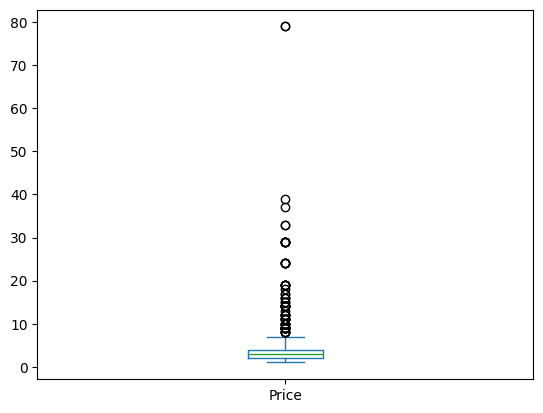

In [664]:
pldf[pldf["Price"]>0].Price.plot.box()

In [665]:
#Lets remove the suspicious outliers record above 30 dollars
pldf[pldf["Price"]>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [666]:
pldf=pldf[pldf["Price"]<=30]

In [668]:
pldf.shape

(9336, 13)